In [ ]:
!pip install geopandas
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 74.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from folium.features import DivIcon



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths to the .shp, .shx, and .dbf files
shp_path = '/content/drive/MyDrive/STUDIO_ML/POA_2021_AUST_GDA2020.shp'
loneliness_path = '/content/drive/MyDrive/STUDIO_ML/loneliness.csv'

# Load the shapefile data
gdf = gpd.read_file(shp_path)

# Load the loneliness data
loneliness_df = pd.read_csv(loneliness_path)

In [ ]:
# Filter postal_code_df to only include specific postal codes
postal_codes_to_include = ['3000','3002','3003','3004','3006','3008','3011','3012','3013','3015','3016','3018',
                           '3019','3020','3021','3022','3023','3024','3025','3026','3027','3028','3029','3030',
                           '3031','3032','3033','3034','3036','3037','3038','3039','3040','3041','3042','3043',
                           '3044','3045','3046','3047','3048','3049','3051','3052','3053','3054','3055','3056',
                           '3057','3058','3059','3060','3061','3062','3063','3064','3065','3066','3067','3068',
                           '3070','3071','3072','3073','3074','3075','3076','3078','3079','3081','3082','3083',
                           '3084','3085','3087','3088','3089','3090','3091','3093','3094','3095','3096','3097',
                           '3099','3101','3102','3103','3104','3105','3106','3107','3108','3109','3111','3113',
                           '3114','3115','3116','3121','3122','3123','3124','3125','3126','3127','3128','3129',
                           '3130','3131','3132','3133','3134','3135','3136','3137','3138','3140','3141','3142',
                           '3143','3144','3145','3146','3147','3148','3149','3150','3151','3152','3153','3154',
                           '3155','3156','3158','3159','3160','3161','3162','3163','3165','3166','3167','3168',
                           '3169','3170','3171','3172','3173','3174','3175','3177','3178','3179','3180','3181',
                           '3182','3183','3184','3185','3186','3187','3188','3189','3190','3191','3192','3193',
                           '3194','3195','3196','3197','3198','3199','3200','3201','3202','3204','3205','3206',
                           '3207','3211','3223','3335','3336','3337','3338','3427','3428','3429','3430','3431',
                           '3432','3433','3750','3751','3752','3753','3754','3755','3756','3757','3759','3761',
                           '3762','3763','3764','3765','3766','3770','3775','3781','3782','3783','3785','3786',
                           '3787','3788','3789','3791','3792','3793','3795','3796','3797','3799','3802','3803',
                           '3804','3805','3806','3807','3808','3809','3810','3910','3911','3912','3913','3915',
                           '3916','3918','3919','3920','3926','3927','3928','3929','3930','3931','3933','3934',
                           '3936','3937','3938','3939','3940','3941','3942','3943','3944','3975','3976','3977',
                           '3978','3980','3981']

gdf = gdf[gdf['POA_CODE21'].isin(postal_codes_to_include)]

In [ ]:
gdf['POA_CODE21'] = gdf['POA_CODE21'].astype(int)
loneliness_df['Unnamed: 0'] = loneliness_df['Unnamed: 0'].astype(int)
# Merge the Geopandas DataFrame with the loneliness DataFrame using an 'inner' join
gdf = gdf.merge(loneliness_df[['Unnamed: 0', 'loneliness']], left_on='POA_CODE21', right_on='Unnamed: 0', how='inner')


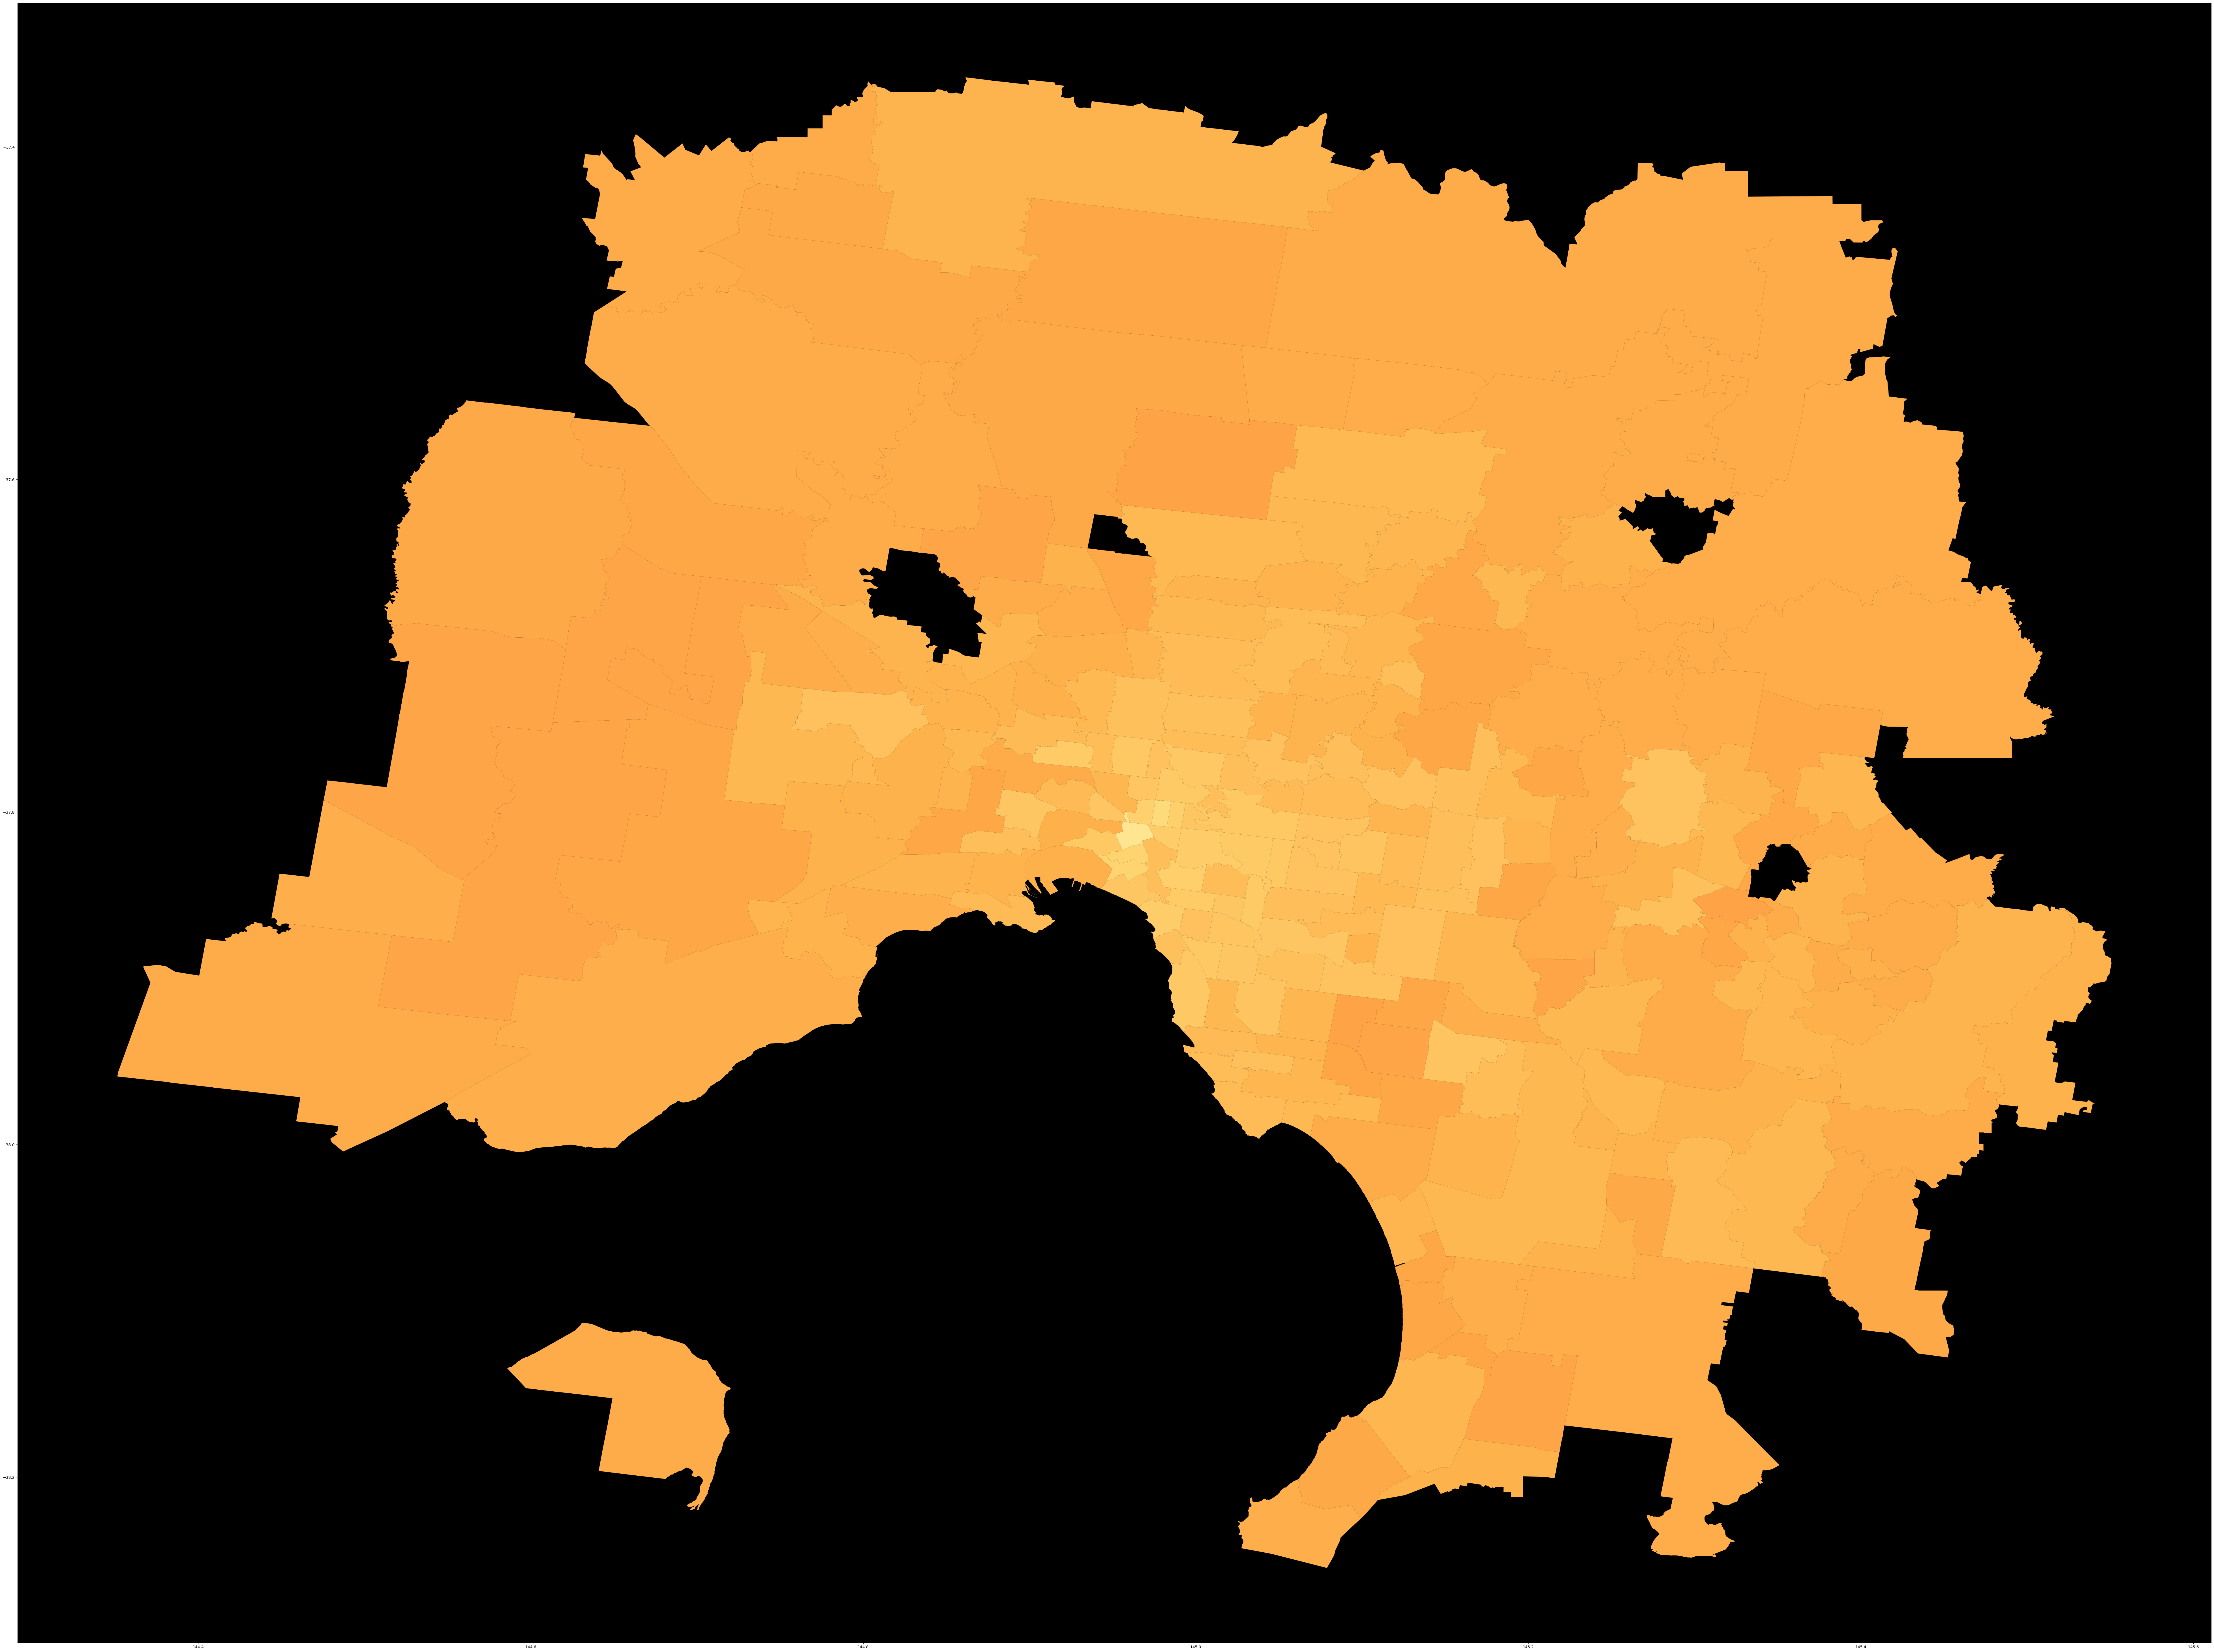

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load your GeoDataFrame
# gdf = gpd.read_file(...)

# Modify the 'loneliness' column: values more than 55 are divided by 2
gdf.loc[gdf['loneliness'] > 55, 'loneliness'] = gdf.loc[gdf['loneliness'] > 55, 'loneliness']/1.20

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(100, 80))

# Set the background color of the plot to black
ax.set_facecolor('black')

# Define a colormap
cmap = plt.get_cmap('YlOrRd')

# Normalize the 'loneliness' column with the new minimum and maximum values
norm = Normalize(vmin=0, vmax=130)

# Plot the GeoDataFrame using the 'loneliness' column to determine colors, with no edgecolor
gdf.plot(column='loneliness', cmap=cmap, linewidth=0.8, ax=ax, edgecolor=None, legend=False, norm=norm)

# Save the figure as a high-resolution image
plt.savefig('high_res_map1.png', dpi=300, bbox_inches='tight', facecolor='black', edgecolor='none')

# Show the plot
plt.show()


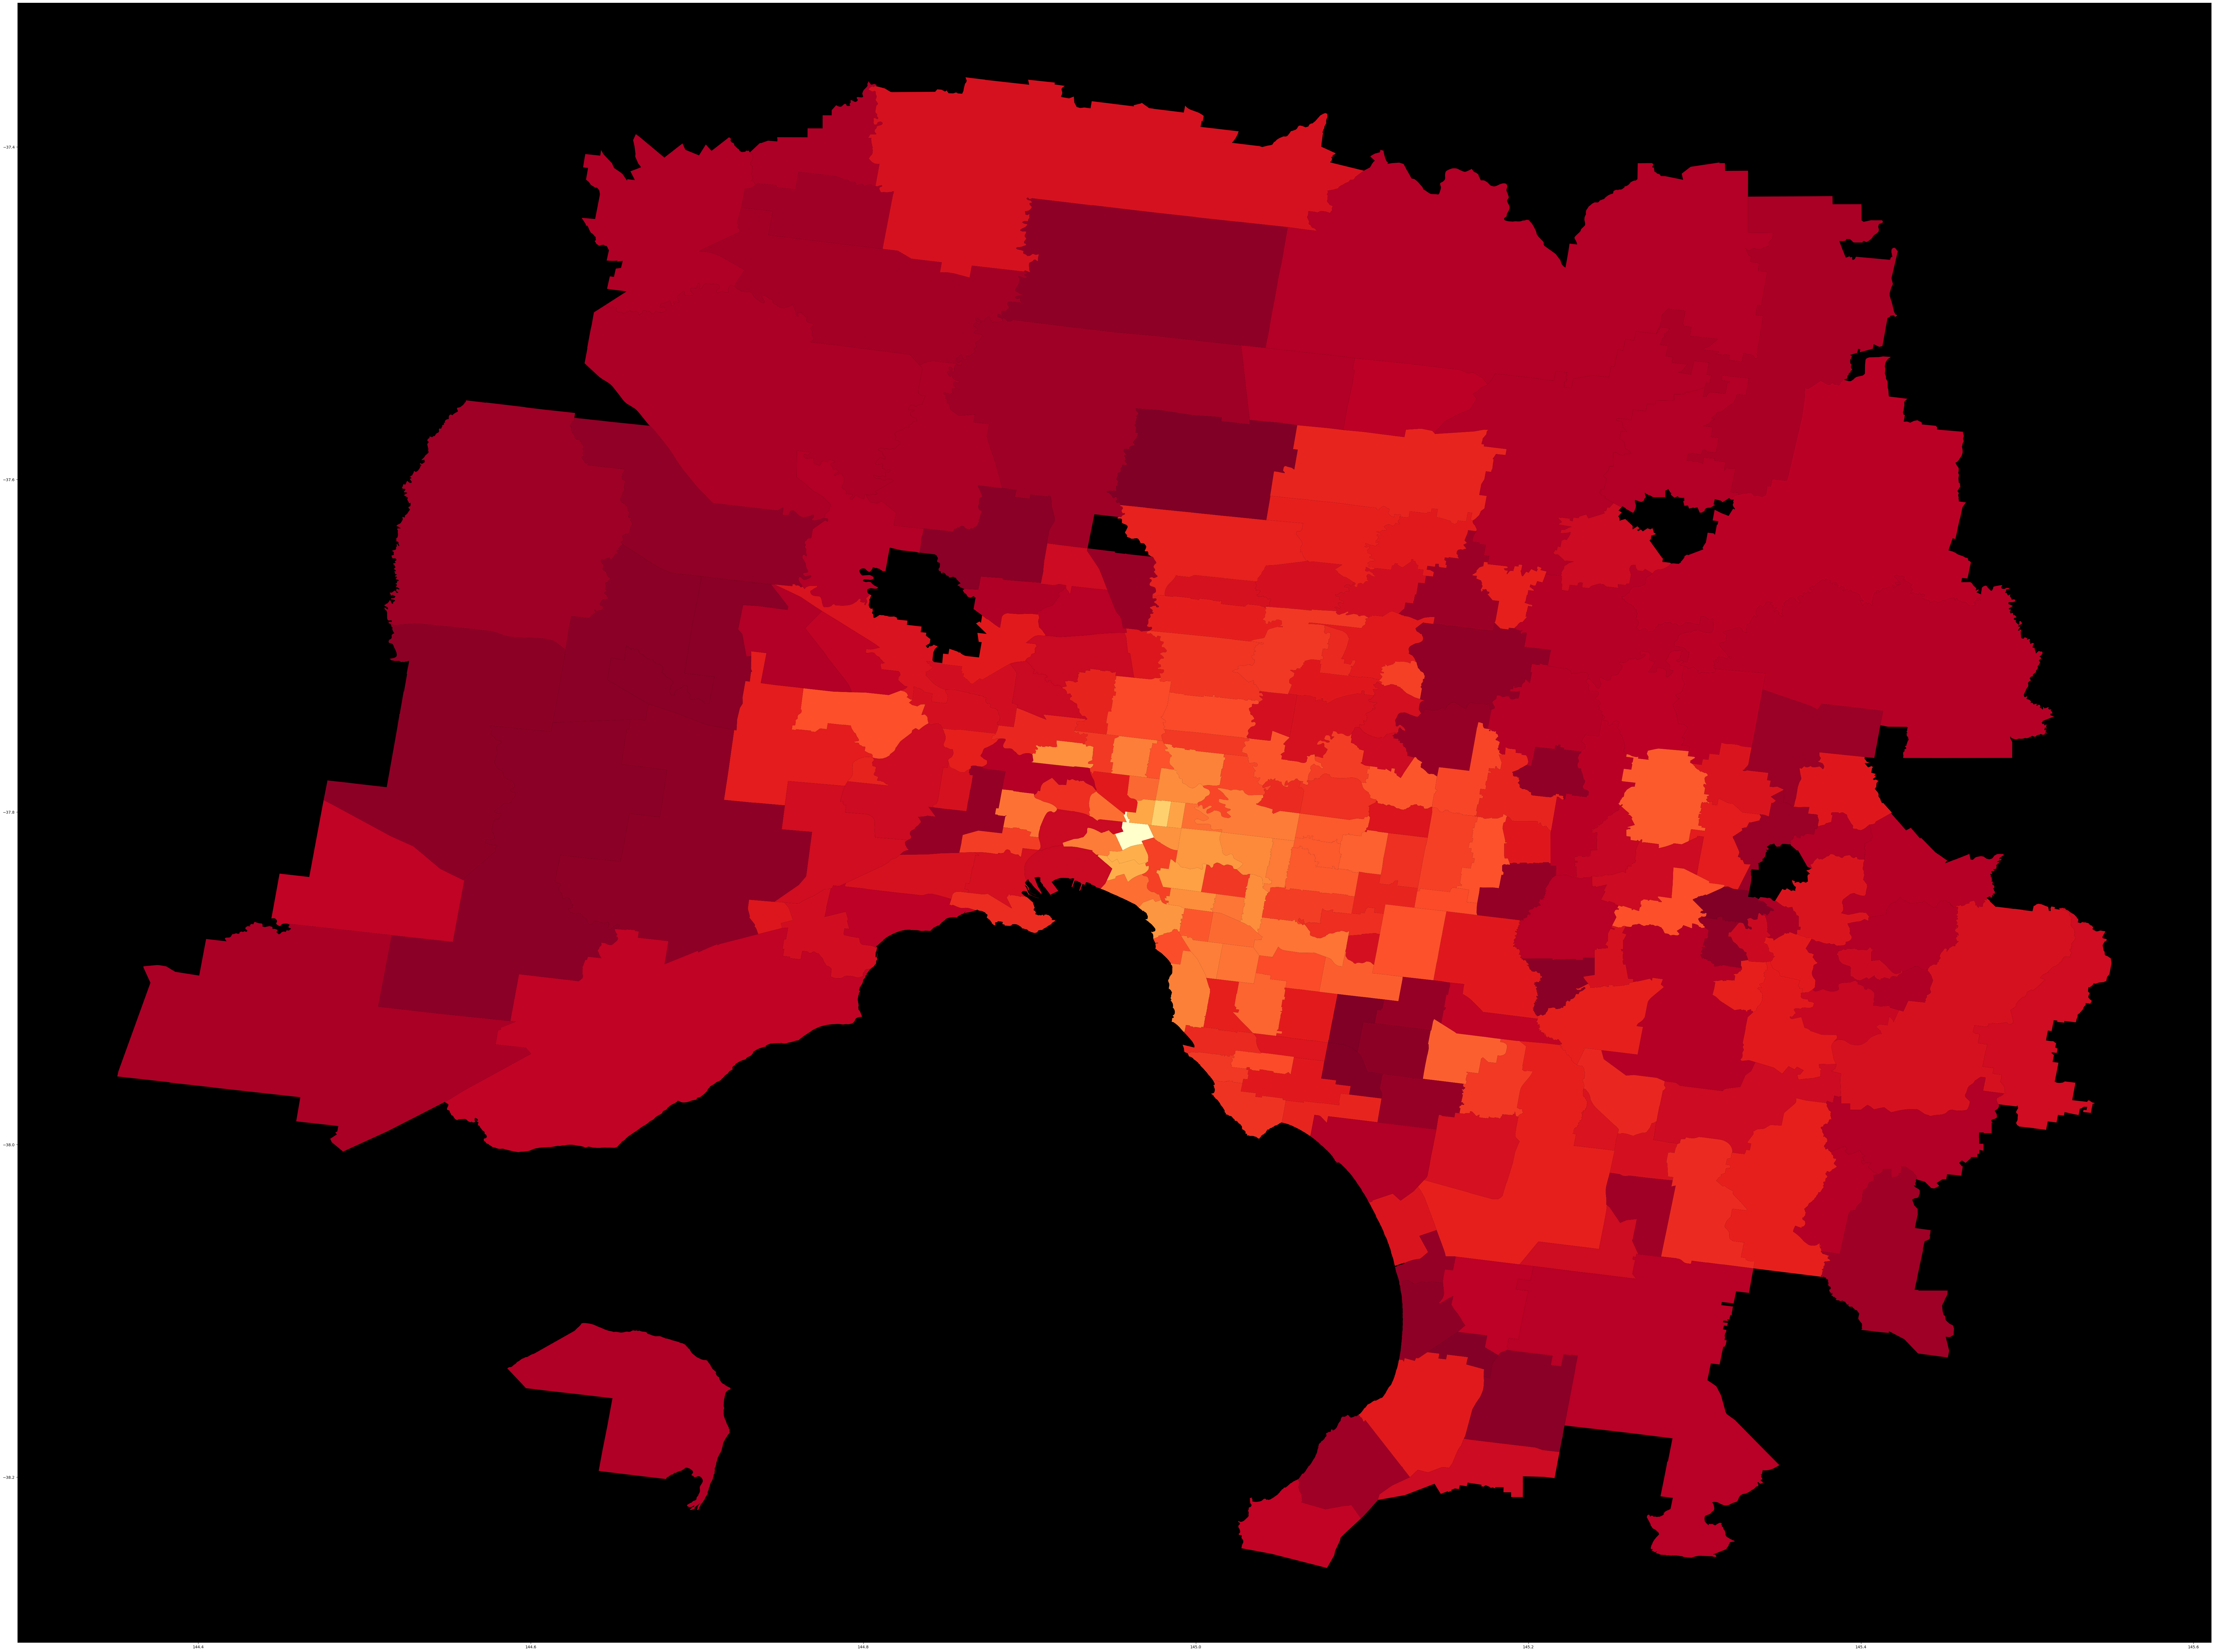

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(100, 80))

# Set the background color of the plot to black
ax.set_facecolor('black')

# Define a colormap
cmap = plt.get_cmap('YlOrRd')

# Normalize the 'loneliness' column
norm = Normalize(vmin=gdf['loneliness'].min(), vmax=gdf['loneliness'].max())

# Plot the GeoDataFrame using the 'loneliness' column to determine colors, with no edgecolor
gdf.plot(column='loneliness', cmap=cmap, linewidth=0.8, ax=ax, edgecolor=None, legend=False, norm=norm)

# Save the figure as a high-resolution image
plt.savefig('high_res_map1.png', dpi=300, bbox_inches='tight', facecolor='black', edgecolor='none')

# Show the plot
plt.show()


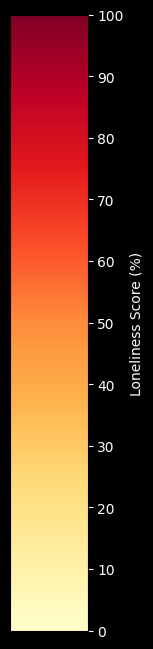

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Create a new figure
fig = plt.figure(figsize=(1, 8))

# Set the background color of the plot to black
fig.patch.set_facecolor('black')

# Define a colormap
cmap = plt.get_cmap('YlOrRd')

# Normalize the range
norm = mpl.colors.Normalize(vmin=0, vmax=100)

# Create colorbar
cbar = mpl.colorbar.ColorbarBase(fig.gca(), cmap=cmap,
                                 norm=norm, orientation='vertical')

# Set the color of the colorbar labels to white
cbar.ax.yaxis.set_tick_params(color='white')

# Set the ticks (percentage values)
cbar.set_ticks(np.arange(0, 101, 10))

# Make the colorbar labels white
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Set the color of the colorbar label
cbar.set_label('Loneliness Score (%)', color='white')

plt.savefig('high_res_legend.png', dpi=300, bbox_inches='tight', facecolor='black', edgecolor='none')

plt.show()


KeyboardInterrupt: ignored

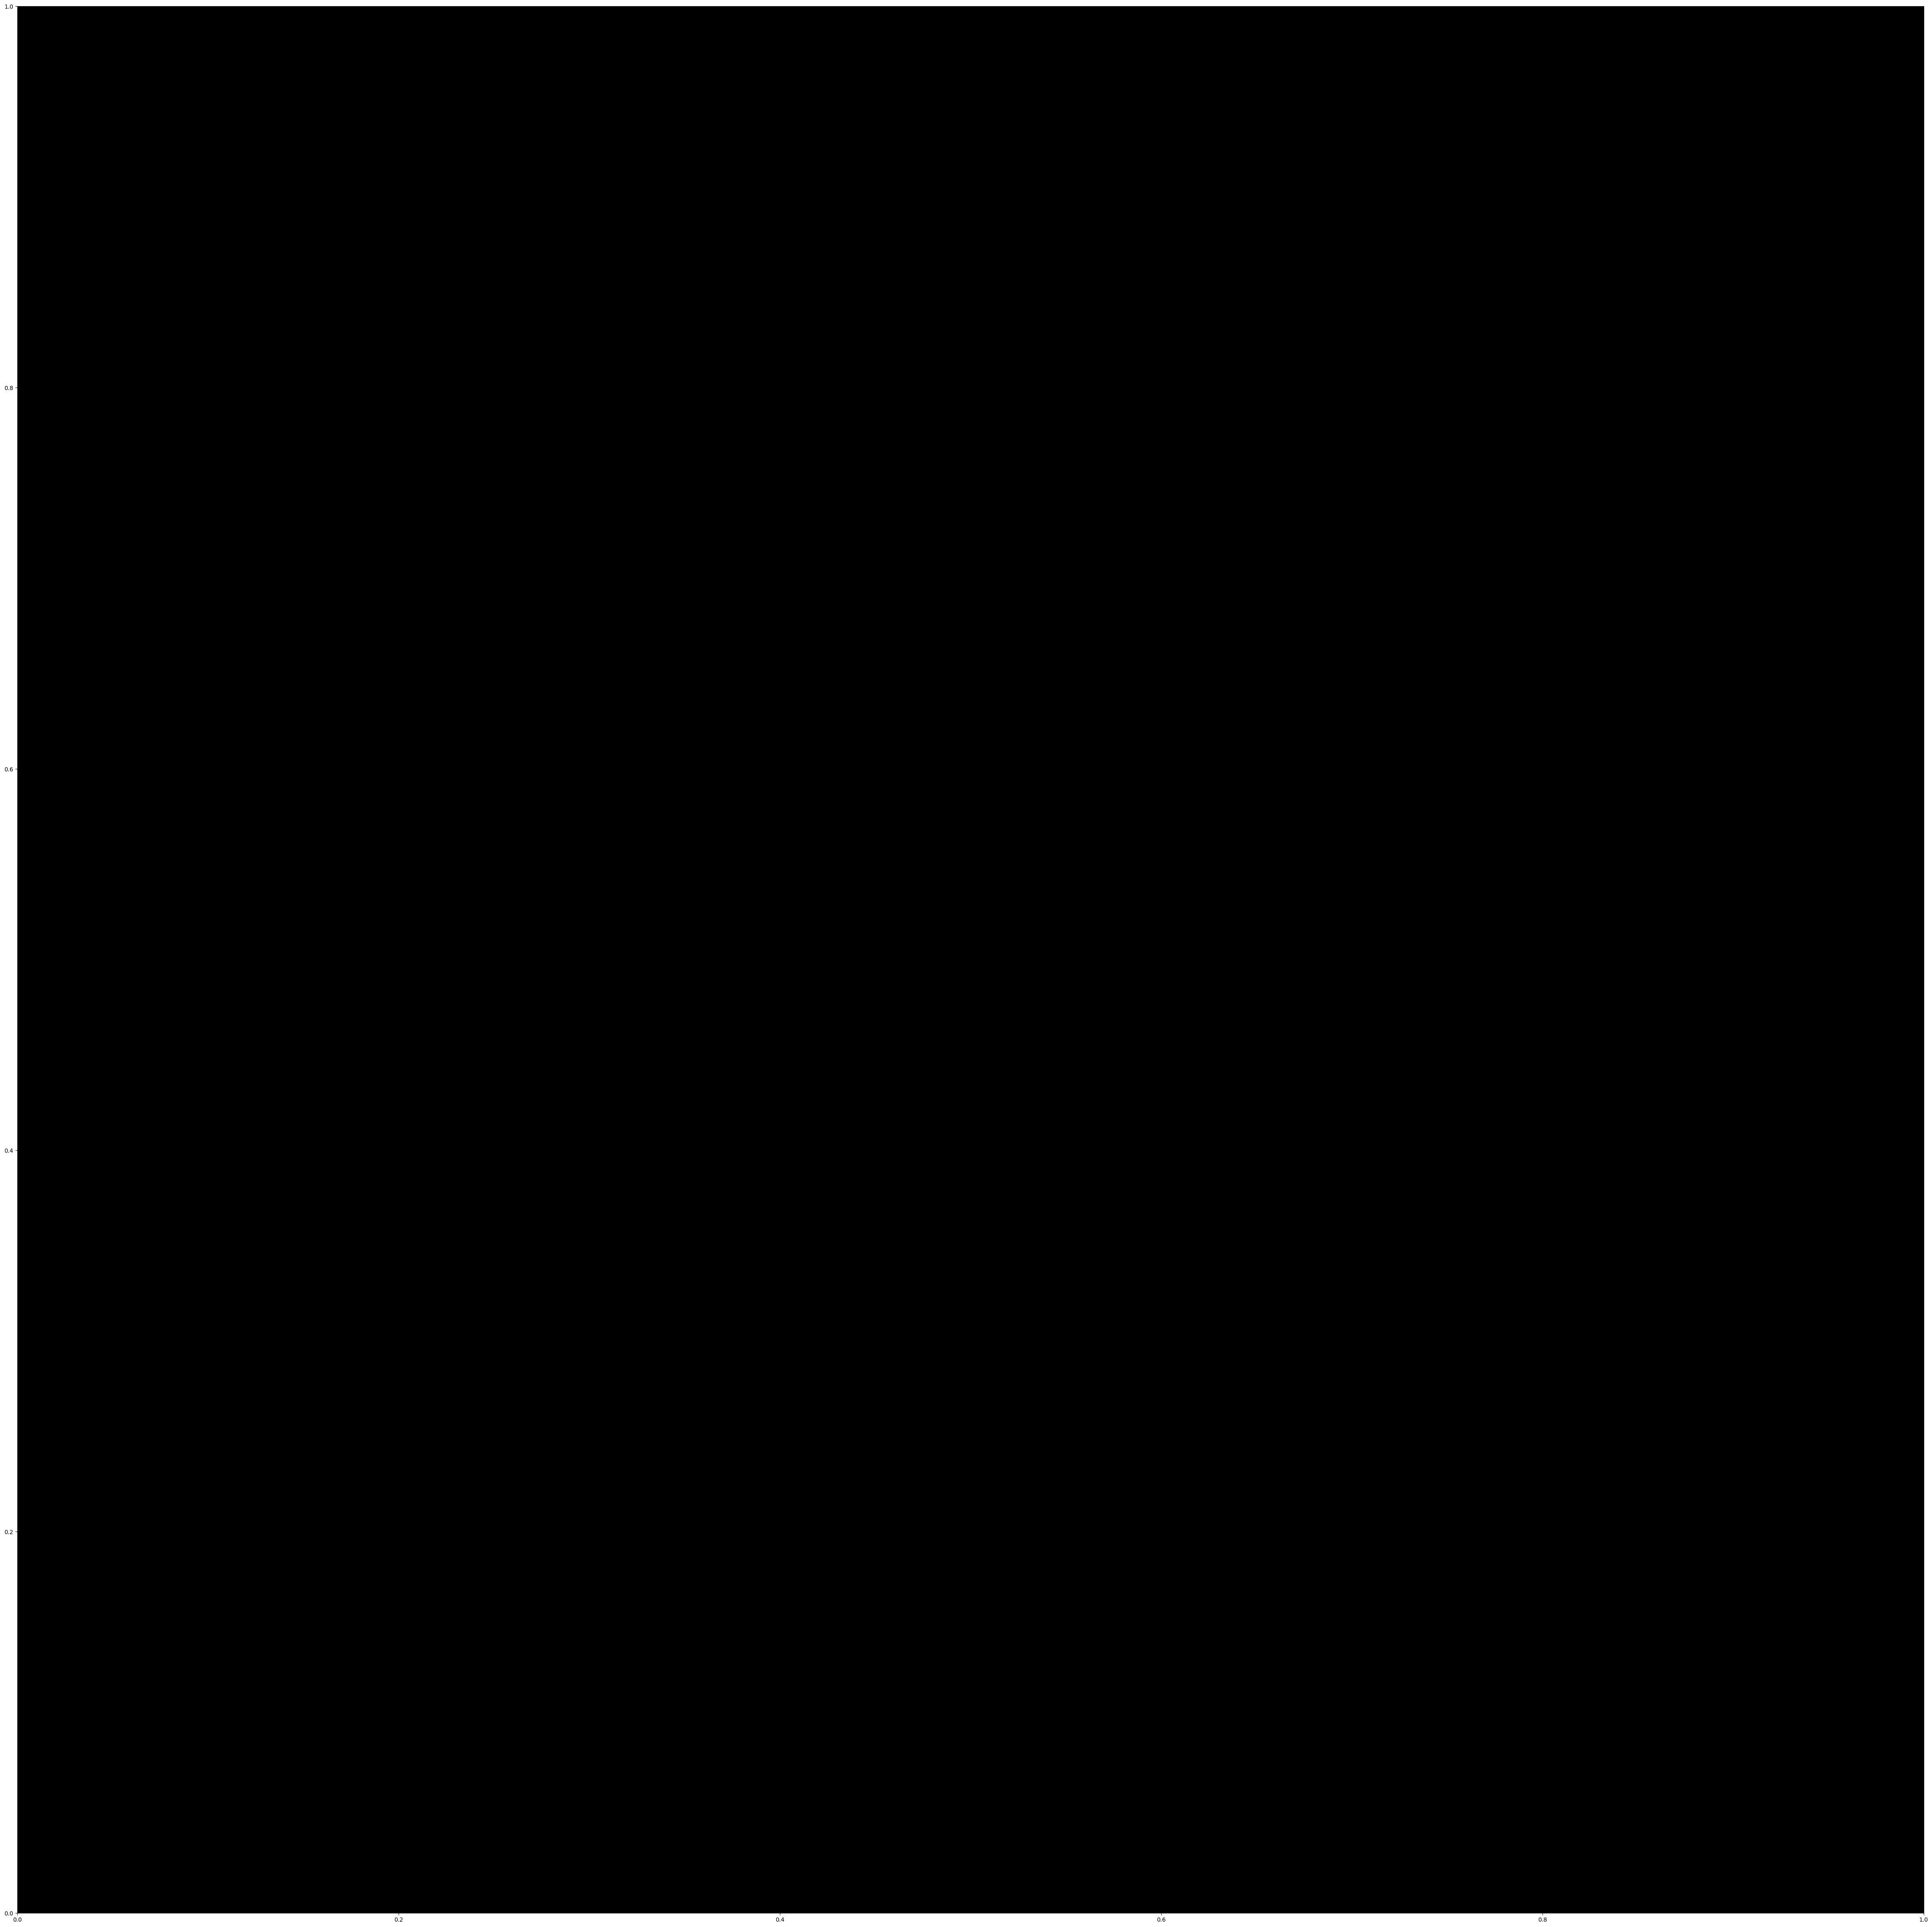

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a new figure and axis
fig = plt.figure(figsize=(100, 80))

# Set the background color of the plot to black
ax.set_facecolor('black')

# Plot the GeoDataFrame with orange boundaries
gdf.boundary.plot(ax=ax, color='white', linewidth=1)

"""# Add the labels
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf["POA_CODE21"]):
    ax.text(x, y, label, fontsize=15, color='white')"""

# Save the figure as a high-resolution image
plt.savefig('high_res_map.png', dpi=300, bbox_inches='tight', facecolor='black')

# Show the plot
plt.show()
0

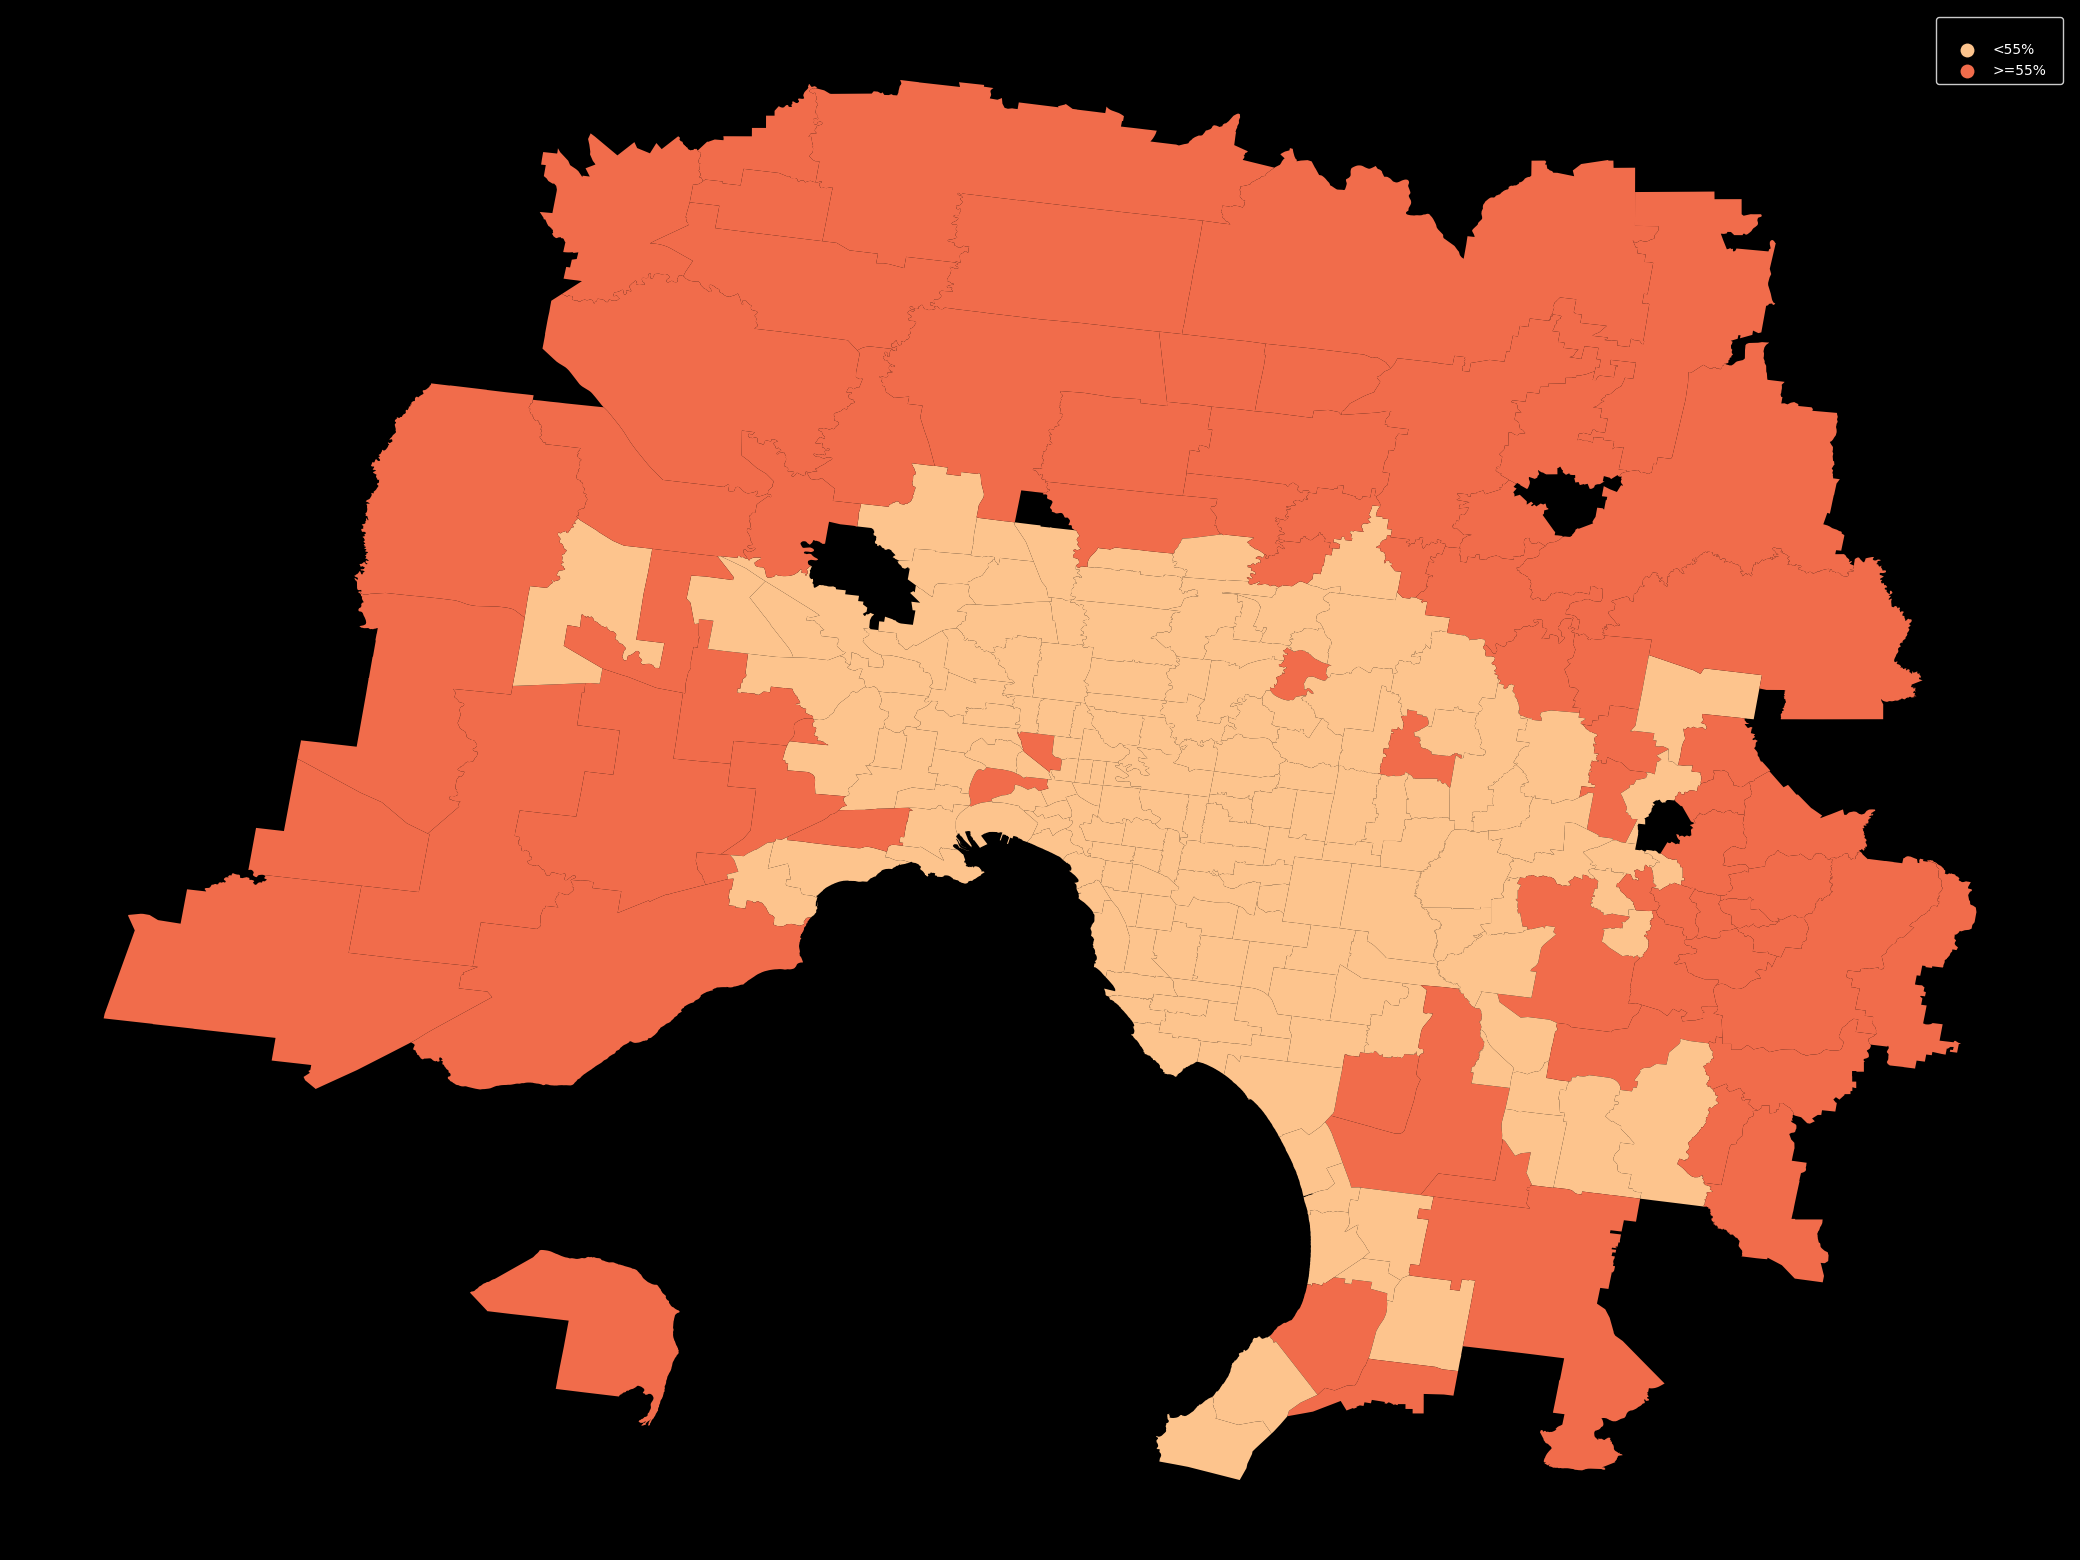

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the GeoDataFrame from the shapefile
# gdf = gpd.read_file("melbourne_postal_areas.shp")

# Create a new binary column based on 'loneliness' values
gdf['lonely'] = gdf['loneliness'] > 55

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Set the background color of the plot to black
fig.patch.set_facecolor('black')

# Define a color map
cmap = ListedColormap(['#FDC48D', '#F16C4B'])

# Plot the GeoDataFrame using the 'lonely' column to determine colors
gdf.plot(column='lonely', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='none', legend=True)

# Set the legend labels and color
legend = ax.get_legend()
legend.set_title('Loneliness Score')
legend.get_frame().set_edgecolor('white')
legend.get_frame().set_facecolor('black')

for text, label in zip(legend.get_texts(), ['<55%', '>=55%']):
    text.set_text(label)
    text.set_color('white')

# Remove the axis
ax.axis('off')

# Save the figure as a high-resolution image
plt.savefig('high_res_map3.png', dpi=300, bbox_inches='tight', facecolor='black')

# Show the plot
plt.show()


In [ ]:
# Convert the 'loneliness' column to a percentage and round it
gdf['loneliness'] = (gdf['loneliness'] * 1).round(0)

# Create a map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=11, tiles="CartoDB Positron")

# Convert the GeoDataFrame to GeoJSON
gdf_json = gdf.to_json()

# Add the choropleth to the map
choropleth = folium.Choropleth(
    geo_data=gdf_json,
    name='choropleth',
    data=gdf,
    columns=['POA_CODE21', 'loneliness'],
    key_on='feature.properties.POA_CODE21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Loneliness Score (%)',
    #color_mapper=colormap  # use the colormap as color_mapper
).add_to(m)

# Display the map
m


In [ ]:
# Save the map as an HTML file
m.save('loneliness_score_map_Legend.html')


In [ ]:
# Convert the 'loneliness' column to a percentage and round it
gdf['loneliness'] = (gdf['loneliness'] * 1).round(0)

# Create a map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=11, tiles="CartoDB Positron")

# Convert the GeoDataFrame to GeoJSON
gdf_json = gdf.to_json()

# Add the choropleth to the map
choropleth = folium.Choropleth(
    geo_data=gdf_json,
    name='choropleth',
    data=gdf,
    columns=['POA_CODE21', 'loneliness'],
    key_on='feature.properties.POA_CODE21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Loneliness Score (%)'
).add_to(m)

# Add labels on the map
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        [centroid.y, centroid.x],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 6pt; color : black">{row["loneliness"]}%</div>',  # font-size is changed to 6pt
        )
    ).add_to(m)

# Display the map
m


In [ ]:
# Save the map as an HTML file
m.save('loneliness_score_map_editfont.html')


In [ ]:
# Convert the 'loneliness' column to a percentage and round it
gdf['loneliness'] = (gdf['loneliness'] * 1).round(0)

# Create a map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=11, tiles="CartoDB Positron")

# Convert the GeoDataFrame to GeoJSON
gdf_json = gdf.to_json()

# Add the choropleth to the map
choropleth = folium.Choropleth(
    geo_data=gdf_json,
    name='choropleth',
    data=gdf,
    columns=['POA_CODE21', 'loneliness'],
    key_on='feature.properties.POA_CODE21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Loneliness Score (%)'
).add_to(m)

# Add labels on the map
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        [centroid.y, centroid.x],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 8pt; color : black">{row["loneliness"]}%</div>',
        )
    ).add_to(m)

# Display the map
m


In [ ]:
# Save the map as an HTML file
m.save('loneliness_score_map.html')


In [ ]:
m